# Load and Visualize FashionMNIST
---
In this notebook, we load and look at images from the [Fashion-MNIST database](https://github.com/zalandoresearch/fashion-mnist).

The first step in any classification problem is to look at the dataset you are working with. This will give you some details about the format of images and labels, as well as some insight into how you might approach defining a network to recognize patterns in such an image set.

PyTorch has some built-in datasets that you can use, and FashionMNIST is one of them; it has already been dowloaded into the `data/` directory in this notebook, so all we have to do is load these images using the FashionMNIST dataset class *and* load the data in batches with a `DataLoader`.

### Load the [data](http://pytorch.org/docs/master/torchvision/datasets.html)

#### Dataset class and Tensors

``torch.utils.data.Dataset`` is an abstract class representing a
dataset. The FashionMNIST class is an extension of this Dataset class and it allows us to 1. load batches of image/label data, and 2. uniformly apply transformations to our data, such as turning all our images into Tensor's for training a neural network. *Tensors are similar to numpy arrays, but can also be used on a GPU to accelerate computing.*

Let's see how to construct a training dataset.


In [1]:
# our basic libraries
import torch
import torchvision

# data loading and transforming
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors for input into a CNN

## Define a transform to read the data in as a tensor
data_transform = transforms.ToTensor()

# choose the training and test datasets
train_data = FashionMNIST(root='./data', train=True,
                                   download=False, transform=data_transform)

# Print out some stats about the training data
print('Train data, number of images: ', len(train_data))

Train data, number of images:  60000


#### Data iteration and batching

Next, we'll use ``torch.utils.data.DataLoader`` , which is an iterator that allows us to batch and shuffle the data.

In the next cell, we shuffle the data and load in image/label data in batches of size 20.

In [2]:
# prepare data loaders, set the batch_size
## TODO: you can try changing the batch_size to be larger or smaller
## when you get to training your network, see how batch_size affects the loss
batch_size = 20

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# specify the image classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Visualize some training data

This cell iterates over the training dataset, loading a random batch of image/label data, using `dataiter.next()`. It then plots the batch of images and labels in a `2 x batch_size/2` grid.

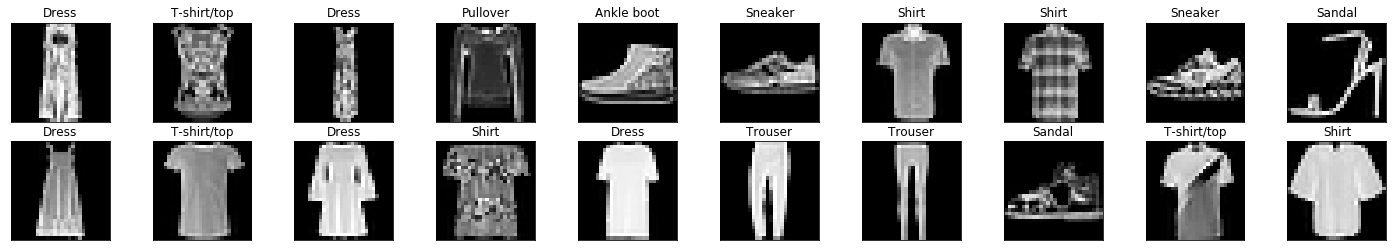

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

### View an image in more detail

Each image in this dataset is a `28x28` pixel, normalized, grayscale image.

#### A note on normalization

Normalization ensures that, as we go through a feedforward and then backpropagation step in training our CNN, that each image feature will fall within a similar range of values and not overly activate any particular layer in our network. During the feedfoward step, a network takes in an input image and multiplies each input pixel by some convolutional filter weights (and adds biases!), then it applies some activation and pooling functions. Without normalization, it's much more likely that the calculated gradients in the backpropagaton step will be quite large and cause our loss to increase instead of converge.


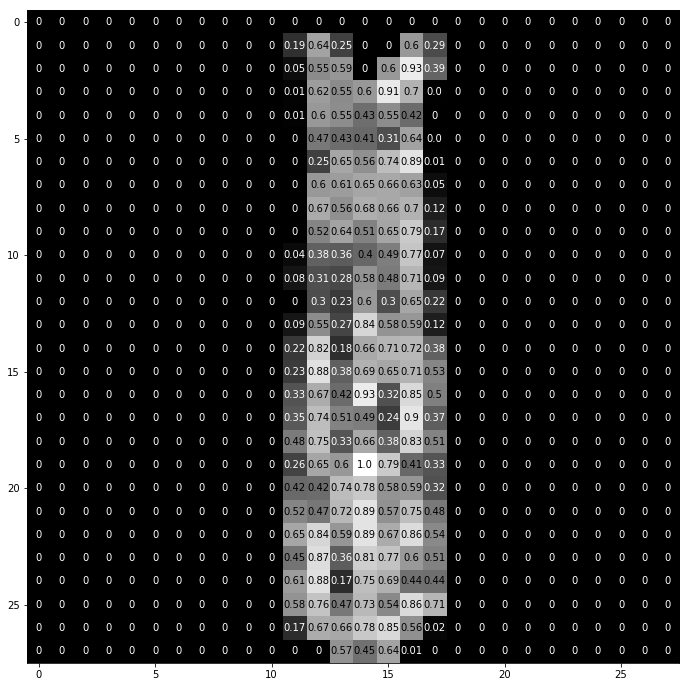

In [4]:
# select an image by index
idx = 2
img = np.squeeze(images[idx])

# display the pixel values in that image
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')